## Bootstrap in a nutshell

Let's say you want to guess an average age of a climber, but you only have 30 entries. You might make a reasonable guess by randomly drawing 30 entries from the dataset. In another words, a same entry can be drawn more than one time. Do this many times, and you'll see a pattern that tells you where the average age might lie in between.

In [1]:
# Libraries for processing arrays faster
import numpy as np
import pandas as pd
# Libraries for drawing graph
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
climber_df = pd.read_csv('./climber_df.csv')

In [3]:
climber_df.shape

(10927, 16)

In [4]:
pd.options.display.max_columns = None

In [5]:
climber_df.head()

,user_id,country,sex,height,weight,age,years_cl,date_first,date_last,grades_count,grades_first,grades_last,grades_max,grades_mean,year_first,year_last
0,1,SWE,0,177,73,41.0,21,1999-02-06 23:00:00,2001-07-31 22:00:00,84,36,55,62,46.750000,1999,2001
1,3,SWE,0,180,78,44.0,22,1999-03-31 22:00:00,2000-07-19 22:00:00,12,53,51,59,52.833333,1999,2000
2,4,SWE,1,165,58,33.0,16,2004-06-30 22:00:00,2009-05-26 22:00:00,119,53,49,64,53.890756,2004,2009
3,10,SWE,0,167,63,52.0,25,2000-01-14 23:00:00,2017-06-01 22:00:00,298,53,49,63,49.406040,2000,2017
4,16,NOR,0,177,68,44.0,21,1998-02-27 23:00:00,2010-05-13 22:00:00,5,53,49,53,51.400000,1998,2010


In [6]:
climber_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10927 entries, 0 to 10926
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   user_id       10927 non-null  int64  
 1   country       10927 non-null  object 
 2   sex           10927 non-null  int64  
 3   height        10927 non-null  int64  
 4   weight        10927 non-null  int64  
 5   age           10927 non-null  float64
 6   years_cl      10927 non-null  int64  
 7   date_first    10927 non-null  object 
 8   date_last     10927 non-null  object 
 9   grades_count  10927 non-null  int64  
 10  grades_first  10927 non-null  int64  
 11  grades_last   10927 non-null  int64  
 12  grades_max    10927 non-null  int64  
 13  grades_mean   10927 non-null  float64
 14  year_first    10927 non-null  int64  
 15  year_last     10927 non-null  int64  
dtypes: float64(2), int64(11), object(3)
memory usage: 1.3+ MB


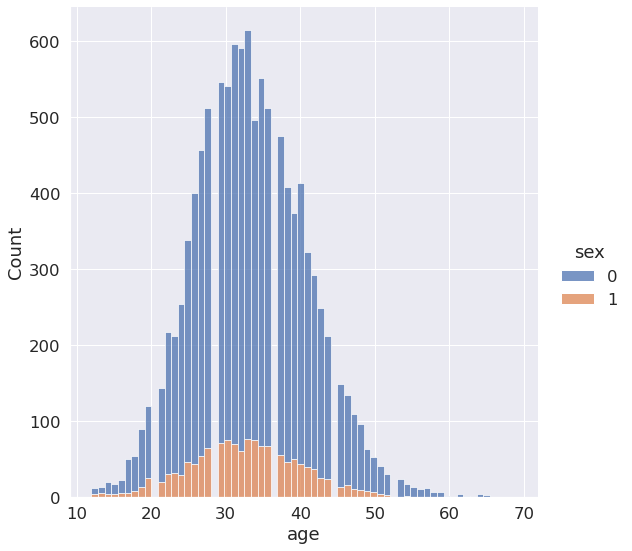

In [7]:
sns.set(font_scale=1.5)
sns.displot(data=climber_df, x='age', height=8, hue='sex', multiple='stack')

<AxesSubplot:xlabel='age', ylabel='grades_last'>

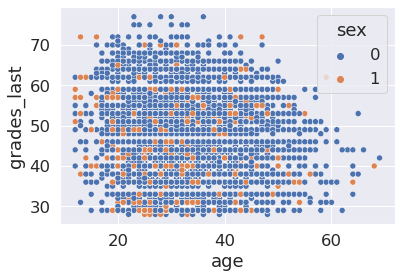

In [9]:
sns.scatterplot(data=climber_df, x='age', y='grades_last', hue='sex')

In [10]:
climber_df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,10927.0,29411.097740,18022.126950,1.0,14651.0,27323.000000,43240.500000,67020.000000
sex,10927.0,0.125103,0.330851,0.0,0.0,0.000000,0.000000,1.000000
height,10927.0,176.152009,8.508669,137.0,171.0,177.000000,182.000000,202.000000
weight,10927.0,67.608676,9.677316,40.0,63.0,68.000000,73.000000,93.000000
age,10927.0,33.333852,7.590989,12.0,28.0,33.000000,38.000000,69.000000
years_cl,10927.0,12.672188,6.108451,1.0,8.0,12.000000,17.000000,29.000000
grades_count,10927.0,79.794546,141.411297,1.0,8.0,28.000000,90.000000,2445.000000
grades_first,10927.0,45.648851,9.478173,28.0,38.0,46.000000,53.000000,75.000000
grades_last,10927.0,46.983802,9.418087,28.0,40.0,48.000000,53.000000,77.000000
grades_max,10927.0,53.764437,9.679533,29.0,46.0,55.000000,62.000000,77.000000


## Beginning of Bootstrap

In [11]:
bootstrap_sample = climber_df.sample(38, replace=True)

In [13]:
n_iterations = 5000
n_size = len(bootstrap_sample)
sampling_means_distribution = []
# Run the loop 5000 times, draw random samples in each loop and get there mean
for i in range(n_iterations):
    iteration_sample = bootstrap_sample.sample(n_size, replace=True)
    iteration_mean = iteration_sample['age'].mean()
    sampling_means_distribution.append(iteration_mean)

**Confidence Interval**  
lower_percentile = mean - z score x (standard deviation / √sample size)  
upper_percentile = mean + z score x (standard deviation / √sample size)  

In [14]:
len(sampling_means_distribution)

5000

<AxesSubplot:>

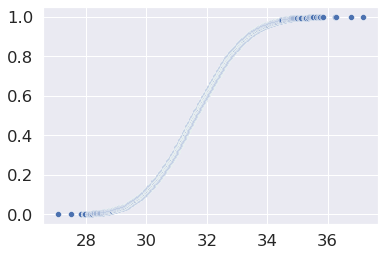

In [15]:
sorted_sampling_means_distribution = np.sort(sampling_means_distribution)
sns.scatterplot(
    x=sorted_sampling_means_distribution,
    y=np.arange(1, sorted_sampling_means_distribution.shape[0] + 1) / sorted_sampling_means_distribution.shape[0]
)

**Percentile**  
The value below which a percentage of data falls  
For example, if you have a data \[1, 2, 3, 4, 5\], and you pick 2, that's 20th percentile of this data. If you pick 5, that's 100th perc

In [16]:
sample_lower, sample_upper = np.percentile(sampling_means_distribution, [2.5, 97.5])

In [17]:
def get_confidence_interval(sample):
    sample_mean = np.mean(sample)
    sd_unit = 1.960 * (np.std(sample) / np.sqrt(len(sample)))
    return sample_mean - sd_unit, sample_mean + sd_unit

true_lower, true_upper = get_confidence_interval(climber_df['age'])

In [18]:
print('95%% confidence interval for bootstrap: [%.2f, %.2f]' % (sample_lower, sample_upper))
print('95%% confidence interval for entire population: [%.2f, %.2f]' % (true_lower, true_upper))

95% confidence interval for bootstrap: [29.00, 34.32]
95% confidence interval for entire population: [33.19, 33.48]
